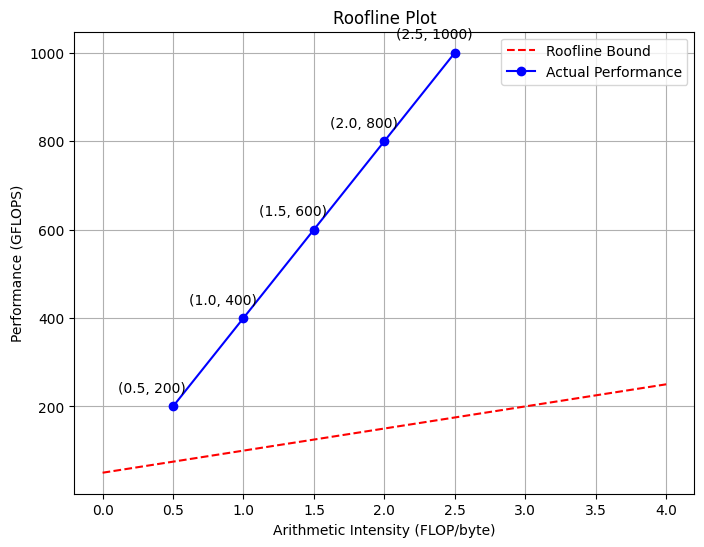

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define your data points
peak_performance = 1000  # The peak performance of your system (e.g., GFLOPS)
memory_bandwidth = 100   # The memory bandwidth of your system (e.g., GB/s)

# Define your data points (e.g., performance and arithmetic intensity)
performance_data = [200, 400, 600, 800, 1000]  # Performance in GFLOPS
arithmetic_intensity = [0.5, 1.0, 1.5, 2.0, 2.5]  # Arithmetic intensity (FLOP/byte)

# Calculate the roofline boundary
roofline = [min(peak_performance, ai * memory_bandwidth) for ai in arithmetic_intensity]

# Create the roofline plot
plt.figure(figsize=(8, 6))
# plt.plot(arithmetic_intensity, roofline, 'r--', label='Roofline Bound')
plt.axhline(y = 1000, color = 'r', linestyle = '-')
plt.plot(arithmetic_intensity, performance_data, 'bo-', label='Actual Performance')

# Set axis labels and legend
plt.xlabel('Arithmetic Intensity (FLOP/byte)')
plt.ylabel('Performance (GFLOPS)')
plt.legend()

# Add text labels for each data point
for i, ai in enumerate(arithmetic_intensity):
    plt.annotate(f'({ai}, {performance_data[i]})', (ai, performance_data[i]), textcoords="offset points", xytext=(-15,10), ha='center')

# Show the plot
plt.grid(True)
plt.title('Roofline Plot')
plt.show()

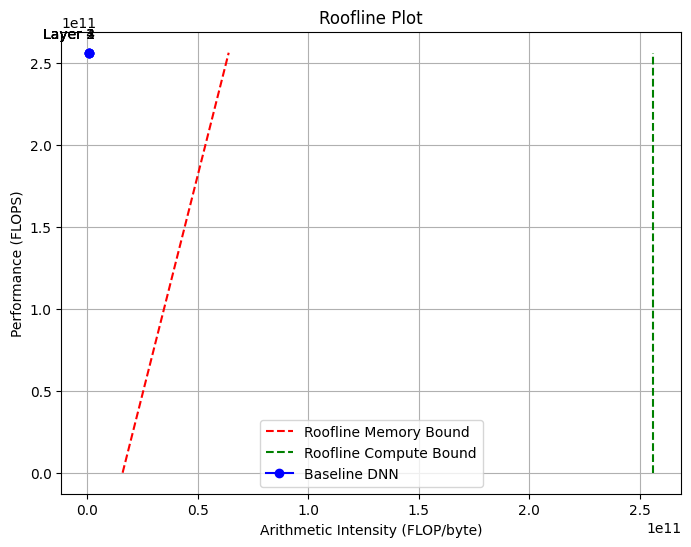

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# System parameters
DRAM_bandwidth = 16e9  # 16 GB/s
DRAM_capacity = 64e9   # 64 GB
weights_SRAM_bandwidth = 128e9  # 128 GB/s
weights_SRAM_capacity = 128e3   # 128 KB
activations_SRAM_bandwidth = 128e9  # 128 GB/s
activations_SRAM_capacity = 2e6     # 2 MB
MAC_PEs = 256           # Number of MAC Processing Elements
MAC_PEs_frequency = 1e9  # 1 GHz

# Define peak performance (assuming all MAC PEs are active)
peak_performance = MAC_PEs * MAC_PEs_frequency  # FLOPS

# Roofline components
roofline_memory_bound = [DRAM_bandwidth, DRAM_capacity]
roofline_compute_bound = [peak_performance, peak_performance]

# Layer-specific data
layer_names = ["Layer 1", "Layer 2", "Layer 3", "Layer 4"]

# Define arithmetic intensities for each layer (You need to calculate these values)
layer_compute_intensity = [1e9, 1e9, 1e9, 1e9]  # Update with actual values based on layer operations

layer_performance = []  # Store performance values for each layer

# Calculate performance for each layer (assuming MAC PEs utilization percentages)
for i, intensity in enumerate(layer_compute_intensity):
    layer_performance.append(min(peak_performance, intensity * activations_SRAM_bandwidth))

# Create the roofline plot
plt.figure(figsize=(8, 6))
plt.plot(roofline_memory_bound, [0, peak_performance], 'r--', label='Roofline Memory Bound')
plt.plot(roofline_compute_bound, [0, peak_performance], 'g--', label='Roofline Compute Bound')

# Plot the actual baseline system performance
plt.plot(layer_compute_intensity, layer_performance, 'bo-', label='Baseline DNN')

# Customize plot labels
plt.xlabel('Arithmetic Intensity (FLOP/byte)')
plt.ylabel('Performance (FLOPS)')
plt.legend()

# Add text labels for each layer
for i, name in enumerate(layer_names):
    plt.annotate(name, (layer_compute_intensity[i], layer_performance[i]), textcoords="offset points", xytext=(-15, 10), ha='center')

# Show the plot
plt.grid(True)
plt.title('Roofline Plot')
plt.show()
